In [49]:
import csv
import json
import requests
import pandas as pd
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator, MultipleLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from alpha_api_key import api_key
from scipy.stats import linregress

def lin_reg(x, y, annotate):
    (slope,intercept,rvalue,pvalue,stderror) = linregress(x,y)
    reg_values = x * slope + intercept
    line_eq = "y = " + str(round(slope, 3)) + "x + " + str(round(intercept, 2))
    plt.plot(x, reg_values, color='r')
    plt.annotate(line_eq, annotate, fontsize=15, color='r')


In [50]:
# Create our stock csv files by pulling from Alpha Advantage API
ticker = ["ABBV", "BMY", "CTLT", "LLY", "JNJ", "MRK", "OGN", "PFE", "VTRS", "ZTS" ]

for i in ticker:
    url = "https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=" + i + \
    "&apikey=" + api_key + "&datatype=csv"
    
    print(url)

https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=ABBV&apikey=QJ3L29WRI4F95OII&datatype=csv
https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=BMY&apikey=QJ3L29WRI4F95OII&datatype=csv
https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=CTLT&apikey=QJ3L29WRI4F95OII&datatype=csv
https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=LLY&apikey=QJ3L29WRI4F95OII&datatype=csv
https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=JNJ&apikey=QJ3L29WRI4F95OII&datatype=csv
https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=MRK&apikey=QJ3L29WRI4F95OII&datatype=csv
https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=OGN&apikey=QJ3L29WRI4F95OII&datatype=csv
https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=PFE&apikey=QJ3L29WRI4F95OII&datatype=csv
https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=VTRS&apikey=QJ3L29WRI4F95OII&datatype=cs

In [51]:
# Import csv files and merge into one data frame
abbv_stock = "csv_files/monthly_ABBV.csv"
bmy_stock = "csv_files/monthly_BMY.csv"
ctlt_stock = "csv_files/monthly_CTLT.csv"
lly_stock = "csv_files/monthly_LLY.csv"
jnj_stock = "csv_files/monthly_JNJ.csv"
mrk_stock = "csv_files/monthly_MRK.csv"
ogn_stock = "csv_files/monthly_OGN.csv"
pfe_stock = "csv_files/monthly_PFE.csv"
vtrs_stock = "csv_files/monthly_VTRS.csv"
zts_stock = "csv_files/monthly_ZTS.csv"

abbv_df = pd.read_csv(abbv_stock).sort_values(by=['timestamp']).reset_index(drop=True)
bmy_df = pd.read_csv(bmy_stock).sort_values(by=['timestamp']).reset_index(drop=True)
ctlt_df = pd.read_csv(ctlt_stock).sort_values(by=['timestamp']).reset_index(drop=True)
lly_df = pd.read_csv(lly_stock).sort_values(by=['timestamp']).reset_index(drop=True)
jnj_df = pd.read_csv(jnj_stock).sort_values(by=['timestamp']).reset_index(drop=True)
mrk_df = pd.read_csv(mrk_stock).sort_values(by=['timestamp']).reset_index(drop=True)
ogn_df = pd.read_csv(ogn_stock).sort_values(by=['timestamp']).reset_index(drop=True)
pfe_df = pd.read_csv(pfe_stock).sort_values(by=['timestamp']).reset_index(drop=True)
vtrs_df = pd.read_csv(vtrs_stock).sort_values(by=['timestamp']).reset_index(drop=True)
zts_df = pd.read_csv(zts_stock).sort_values(by=['timestamp']).reset_index(drop=True)

merge_df = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(\
            abbv_df, bmy_df, how='outer'), ctlt_df, how='outer'), lly_df, how='outer'), \
            jnj_df, how='outer'), mrk_df, how='outer'), ogn_df, how='outer'), \
            pfe_df, how='outer'), vtrs_df, how='outer'), zts_df, how='outer')

# Format timestamp column so they are all the same
merge_df['timestamp'] = pd.to_datetime(merge_df['timestamp'], format='mixed')

# Save merged data frame to new csv
merge_df.to_csv('csv_files/merge_stock.csv', index=False)

graph_df = merge_df.copy()

graph_df['timestamp'] = graph_df['timestamp'].apply(mdates.date2num)
graph_df['timestamp'] = graph_df['timestamp'].astype(float)

In [52]:
merge_df.sort_values(by = 'timestamp', inplace = True)

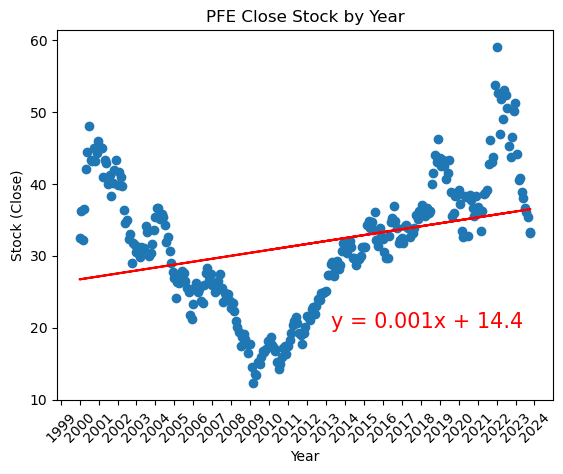

In [88]:
#Graphing PFE

pfe_df = graph_df.loc[graph_df['ticker'] == 'PFE']

x = pfe_df['timestamp']
y = pfe_df['close']

plt.xticks(rotation=45)
plt.plot_date(x, y)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlabel('Year')
plt.ylabel('Stock (Close)')
plt.title('PFE Close Stock by Year')
annotate = (15800.0, 20)

lin_reg(x, y, annotate)
plt.savefig("graphs/PFE_graph.png")
plt.show()

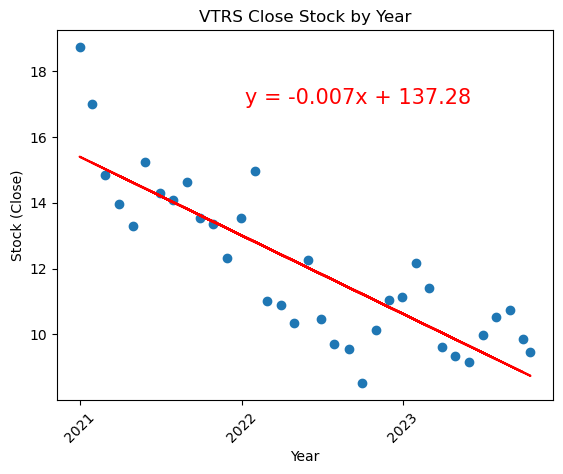

In [89]:
#Graphing VTRS

vtrs_df = graph_df.loc[graph_df['ticker'] == 'VTRS']
x = vtrs_df['timestamp']
y = vtrs_df['close']
plt.xticks(rotation=45)
plt.plot_date(x, y)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlabel('Year')
plt.ylabel('Stock (Close)')
plt.title('VTRS Close Stock by Year')
annotate = (19000.0, 17)

lin_reg(x, y, annotate)
plt.savefig("graphs/VTRS_graph.png")
plt.show()

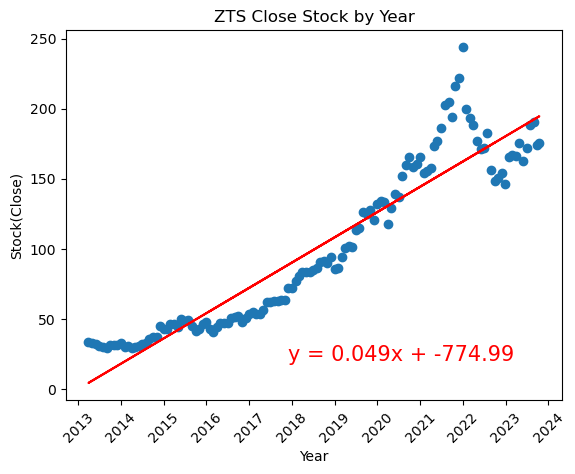

In [90]:
#Graphing ZTS

zts_df_merged = graph_df.loc[graph_df['ticker'] == 'ZTS']

x = zts_df_merged['timestamp']
y = zts_df_merged['close']

plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Stock(Close)')
plt.title('ZTS Close Stock by Year')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
annotate = (17500.0, 20)
plt.plot_date(x, y)

lin_reg(x, y, annotate)

plt.savefig("graphs/ZTS_graph.png")

(array([ 9496., 10957., 12418., 13879., 15340., 16801., 18262., 19723.]),
 [Text(9496.0, 0, '1996'),
  Text(10957.0, 0, '2000'),
  Text(12418.0, 0, '2004'),
  Text(13879.0, 0, '2008'),
  Text(15340.0, 0, '2012'),
  Text(16801.0, 0, '2016'),
  Text(18262.0, 0, '2020'),
  Text(19723.0, 0, '2024')])

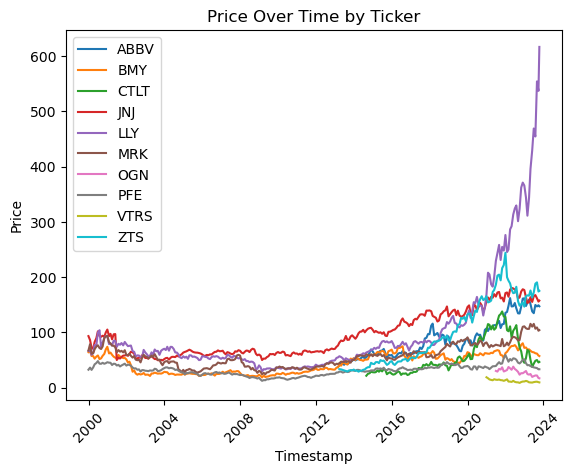

In [60]:
for ticker, group in merge_df.groupby('ticker'):
    plt.plot(group['timestamp'], group['close'], label=ticker)

plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Price Over Time by Ticker')
plt.legend()
plt.xticks(rotation=45)

In [75]:
merge_df

,ticker,timestamp,open,high,low,close,volume
908,JNJ,1999-12-31,103.30,103.400,90.13,93.25,71283600
527,LLY,1999-12-31,71.13,73.880,63.63,66.50,52936700
129,BMY,1999-12-31,72.63,74.560,59.94,64.19,91559200
1511,PFE,1999-12-31,36.13,36.500,32.19,32.44,256858000
1195,MRK,1999-12-31,77.75,78.130,66.06,67.19,110562800
...,...,...,...,...,...,...,...
838,JNJ,2023-10-16,155.42,159.270,153.32,157.53,63914874
526,CTLT,2023-10-16,45.20,47.795,42.20,46.52,20089454
1125,MRK,2023-10-16,102.83,105.370,100.92,104.14,67907278
1707,VTRS,2023-10-16,10.29,10.370,9.27,9.47,113735863
